## Fitting drug response curves with sigmoid function

In [1]:
import pandas as pd
import numpy as np


from tqdm import tqdm
import warnings
from fitting import *

warnings.filterwarnings("ignore")
_FOLDER = "data/"
_FOLDER_2 = "figures/"

## Fitting data

In [3]:
df = pd.read_csv("results/filt_auc_06.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'auc', 'spearman_r', 'count_missing'],
      dtype='object')

### sigmoid_4_param

In [4]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 41613/41613 [04:24<00:00, 157.51it/s]

R2>0: (26988, 33)
R2>0.9 22271
Number of samples with fitting <0.1: 2247

CPU times: user 4min 24s, sys: 1.27 s, total: 4min 25s
Wall time: 4min 24s


### sigmoid_2_param

100%|██████████| 26988/26988 [00:20<00:00, 1320.17it/s]


R2>0: (26988, 35)
R2>0.9 17719
CPU times: user 20.6 s, sys: 104 ms, total: 20.7 s
Wall time: 20.6 s


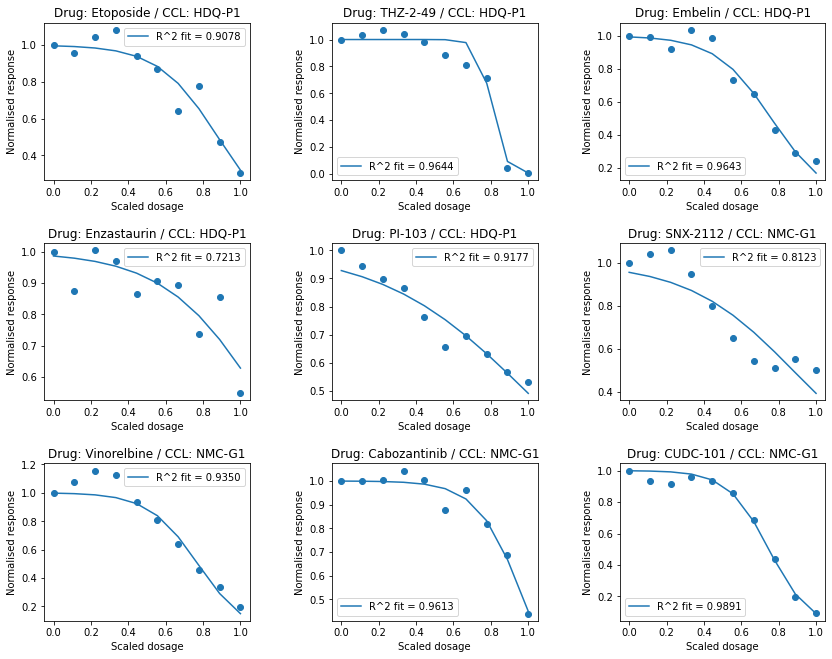

In [7]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

100%|██████████| 26988/26988 [00:31<00:00, 859.64it/s]


R2>0: (26965, 37)
R2>0.9 22024
CPU times: user 31.6 s, sys: 209 ms, total: 31.8 s
Wall time: 31.6 s


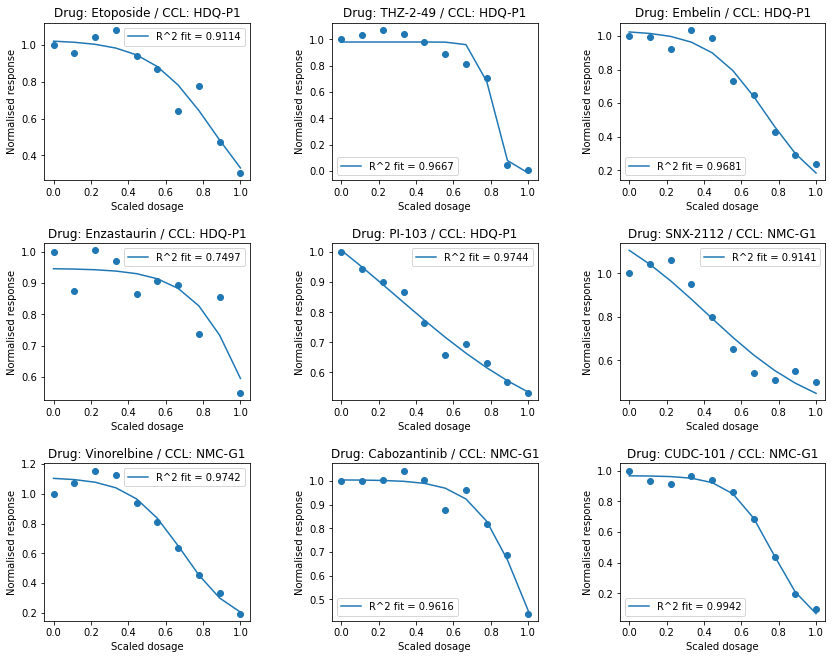

In [8]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### fsigmoid

100%|██████████| 26965/26965 [00:21<00:00, 1259.32it/s]


(26942, 39)


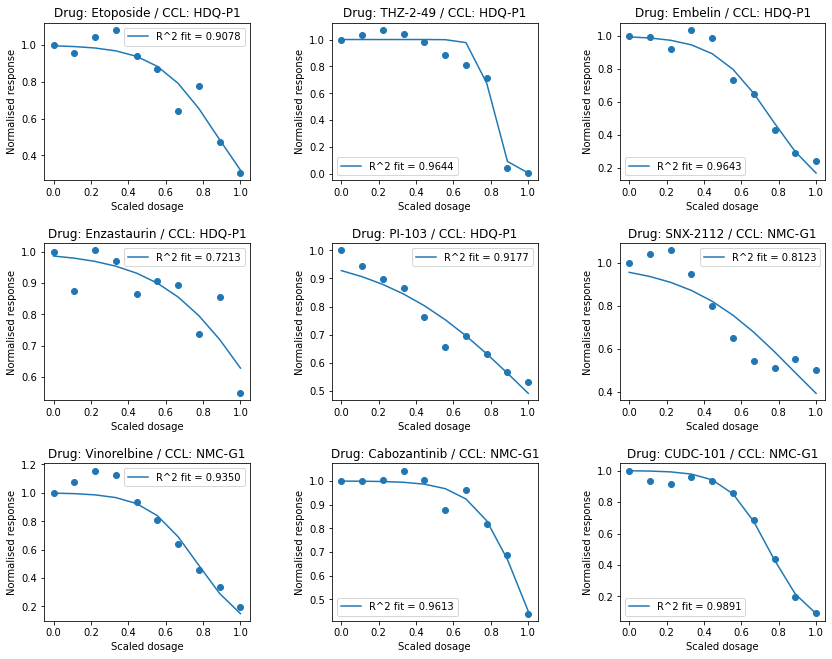

In [9]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

100%|██████████| 26942/26942 [01:10<00:00, 384.87it/s]


R2>0: (26033, 41)
R2>0.9 23401
CPU times: user 1min 10s, sys: 333 ms, total: 1min 10s
Wall time: 1min 10s


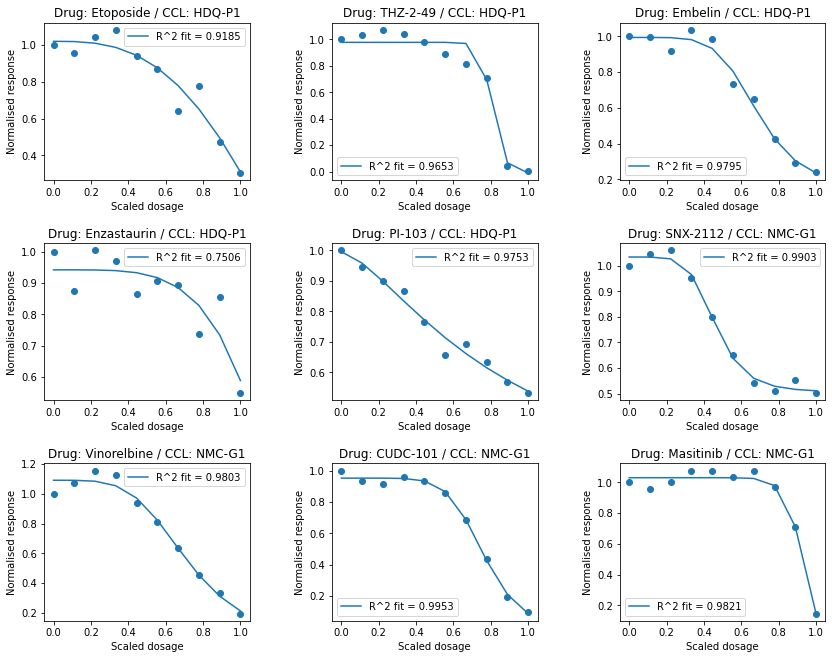

In [10]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### LL4_4_param

100%|██████████| 26033/26033 [01:10<00:00, 369.71it/s]


R2>0: (25867, 43)
R2>0.9 23253
CPU times: user 1min 10s, sys: 405 ms, total: 1min 11s
Wall time: 1min 10s


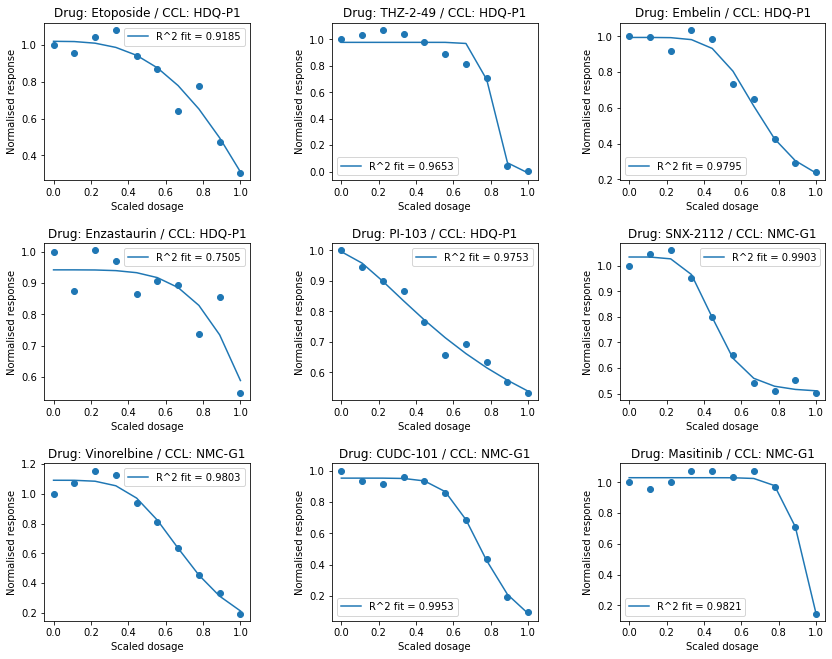

In [12]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

100%|██████████| 25867/25867 [01:13<00:00, 350.76it/s]


R2>0: (24918, 45)
R2>0.9 22417
CPU times: user 1min 14s, sys: 265 ms, total: 1min 14s
Wall time: 1min 13s


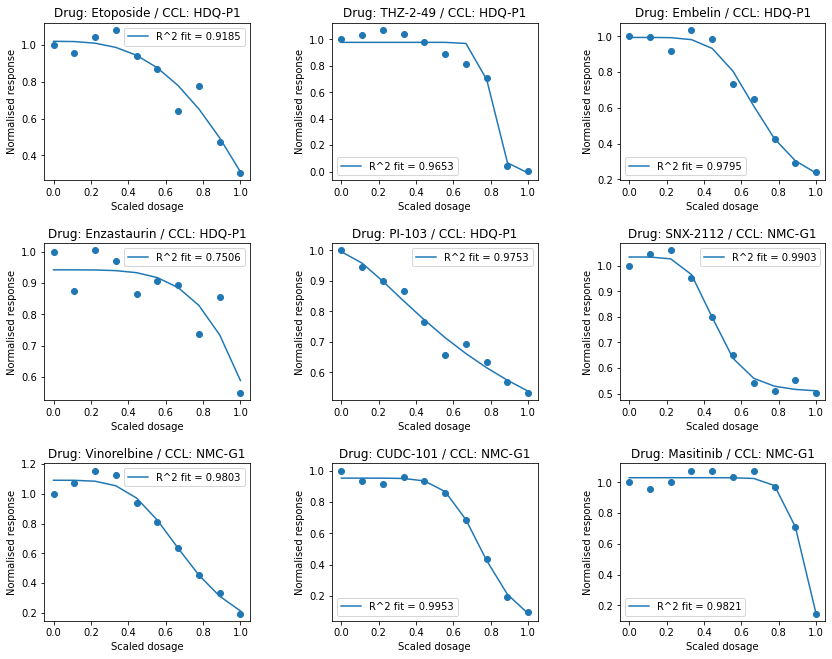

In [13]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

100%|██████████| 24918/24918 [01:14<00:00, 335.39it/s]


R2>0: (24142, 47)
R2>0.9 19653
CPU times: user 1min 14s, sys: 366 ms, total: 1min 15s
Wall time: 1min 14s


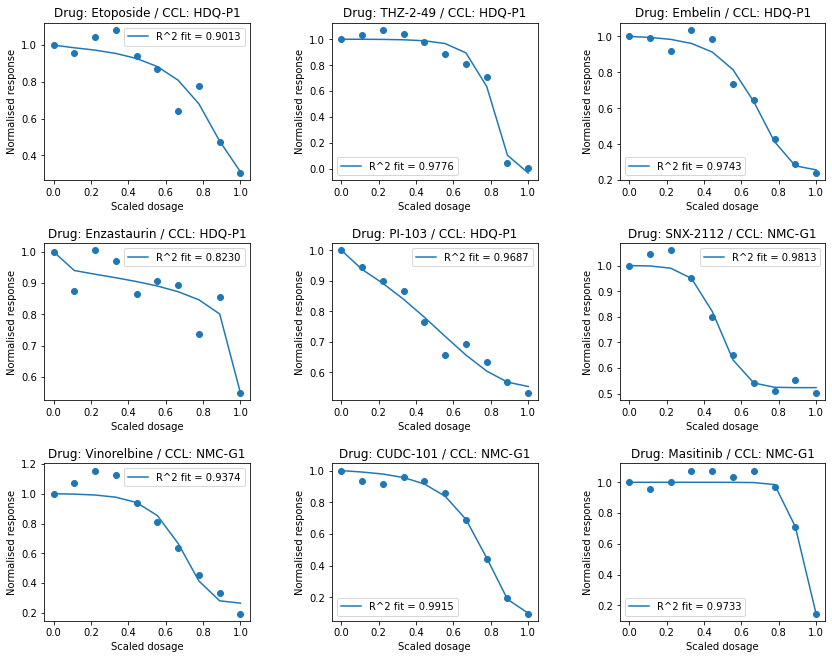

In [14]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [15]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [16]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

,logistic_4_param_r2,logLogist_3_param_r2,ll4_4_param_r2,sigmoid_3_param_r2,sigmoid_4_param_r2,fsigmoid_r2,ll4R_4_param_r2,sigmoid_2_param_r2,better_fitting
0,0.918497,0.901337,0.918497,0.911393,9.136835e-01,0.907841,0.918497,0.907841,ll4_4_param
1,0.965288,0.977597,0.965288,0.966673,9.667183e-01,0.964416,0.965288,0.964416,logLogist_3_param
3,0.979466,0.974261,0.979466,0.968081,9.773357e-01,0.964311,0.979466,0.964311,ll4R_4_param
5,0.750556,0.823042,0.750506,0.749671,8.230797e-09,0.721291,0.750627,0.721291,logLogist_3_param
6,0.975339,0.968741,0.975339,0.974394,9.747491e-01,0.917673,0.975339,0.917673,logistic_4_param


In [17]:
df["better_fitting"].value_counts()

sigmoid_4_param      5982
ll4R_4_param         5498
ll4_4_param          4513
logistic_4_param     4291
logLogist_3_param    3773
sigmoid_3_param        85
Name: better_fitting, dtype: int64

In [18]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.98
logistic_4_param,10345
ll4_4_param,10344
ll4R_4_param,10344
sigmoid_4_param,9967
logLogist_3_param,7384
sigmoid_3_param,6190
fsigmoid,3880
sigmoid_2_param,3862


In [19]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.95
logistic_4_param,17759
ll4_4_param,17759
ll4R_4_param,17759
sigmoid_4_param,16895
logLogist_3_param,14567
sigmoid_3_param,13613
fsigmoid,9643
sigmoid_2_param,9608


In [20]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.9
ll4R_4_param,21876
logistic_4_param,21875
ll4_4_param,21875
sigmoid_4_param,20671
sigmoid_3_param,19705
logLogist_3_param,19653
fsigmoid,15841
sigmoid_2_param,15817


In [21]:
df.to_csv("results/fit_auc_06.csv")